LAB2 MACHINE LEARNING

In [2]:
from scipy.optimize import minimize
import numpy as np , random , math
import matplotlib . pyplot as plt

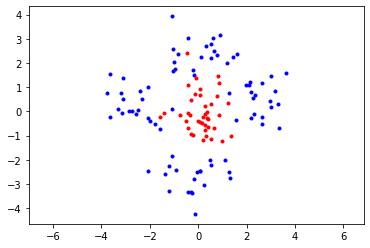

In [316]:
# Data

np.random.seed(100)
random.seed(2)

classA = np.concatenate((np.random.randn(20, 2) * 0.7 + [2.5, 0.5], np.random.randn(20, 2) * 0.7 + [-2.5, 0.5], np.random.randn(20, 2) * 0.7 + [0, -2.5],  np.random.randn(20, 2) * 0.7 + [0, 2.5]))
#classA = np.random.randn(20, 2) * 0.5 + [0.0, 0.5]
classB = np.random.randn(40, 2) * 0.7 + [0, 0]
#classA = np.concatenate((np.random.randn(20, 2) * 0.3 + [-3.5, 1.5], np.random.randn(20, 2) * 0.3 + [0, 2.5]))



#classA = np.array([[-1,0]])
#classB = np.array([[1,0]])

inputs = np.concatenate(( classA , classB )) 
targets = np.concatenate((np.ones(classA.shape[0]) , -np.ones(classB.shape[0])))

N = inputs.shape[0] # Number of rows (samples)

permute=list(range(N)) 
random.shuffle(permute) 
inputs = inputs[permute , :]
targets = targets[permute]

# Plotting

plt.plot([p[0] for p in classA], [p[1] for p in classA],'b.') 
plt.plot([p[0] for p in classB], [p[1] for p in classB],'r.') 

plt.axis('equal') # Force same scale on both axes 
plt.savefig('svmplot.pdf') # Save a copy in a file 
plt.show() # Show the plot on the screen

/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  "minimize step, clipping to bounds", RuntimeWarning)


True


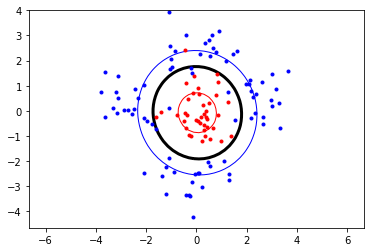

In [321]:
############### Kernel function ##############

def kernel(x1,x2, type):

    if type == 'linear':
        return x1.T @ x2
    
    if type == 'PolynomialP2':
        return ((x1.T @ x2) +1)**2
    
    if type == 'PolynomialP3':
        return ((x1.T @ x2) +1)**3
    
    if type == 'PolynomialP4':
        return ((x1.T @ x2) +1)**4
    
    if type == 'PolynomialP6':
        return ((x1.T @ x2) +1)**6
    
    if type == 'RBF':
        norm = np.linalg.norm(x1-x2)
        sigma = 1.0
        return np.exp(-(norm**2)/(2*sigma*sigma))



############### Matrix P ##############

def matrixP(targets, data, kernel_type):     # N = number of points
    N = len(targets)
    matrix = np.eye((N))
    for i in range(N):
        for j in range(N):
            matrix[i,j]= targets[i]*targets[j]*kernel(data[i],data[j], kernel_type )
    
    return matrix


################ Function objective ###############

def objective(alpha):
    return 0.5*np.dot(alpha.T, np.dot(P,alpha)) - np.sum(alpha)    #Formule OK


################ Constraints ###############

def zerofun(alpha):
    return np.dot(alpha.T,targets)              #Formule OK


################ Function minimize ###############

def minimize_fct(objective, start, bounds, constraints):
    return minimize(objective,start, bounds=bounds , constraints = constraints)



# ------------------------------------------------------------------------------------------------------------------------------------

################ Parameters ###############

type = 'PolynomialP2'
slack = True
P = matrixP(targets,inputs,type)
C = 0.01
if slack :  
    B = [(0, C) for b in range(N)]
else:
    B = [(0, None) for b in range(N)]
XC ={'type':'eq', 'fun':zerofun}
start = np.zeros(N)


# ------------------------------------------------------------------------------------------------------------------------------------


############### Extract the non-zero alpha values ##############

res = minimize_fct(objective, start, B, XC)

alphas = res['x']
print(res['success'])
non_zero_alphas = []

for i in range(N):
    if alphas[i] >=10**(-5):
        non_zero_alphas.append([alphas[i], inputs[i], targets[i]])      #Formule OK


############## Calculate the b value ##############

if slack:
    for i in range(len(non_zero_alphas)):
        if non_zero_alphas[i][0]<C:
            sv = non_zero_alphas[i][1]
            b = - non_zero_alphas[i][2]
            break
else:
    sv = non_zero_alphas[0][1]
    b = - non_zero_alphas[0][2]



for i in range(len(non_zero_alphas)):
    b += non_zero_alphas[i][0]*non_zero_alphas[i][2]*kernel(sv,non_zero_alphas[i][1], type)


############### Indicator function ##############

def indicator(x,y):
    result = -b
    for i in range(len(non_zero_alphas)):
        result += non_zero_alphas[i][0]*non_zero_alphas[i][2]*kernel(np.array([x,y]),non_zero_alphas[i][1], type)
    return result



############### Plotting ##############

plt.plot([p[0] for p in classA], [p[1] for p in classA],'b.') 
plt.plot([p[0] for p in classB], [p[1] for p in classB],'r.') 

plt.axis('equal') # Force same scale on both axes 
plt.savefig('svmplot.pdf') # Save a copy in a file 

############### Boundary ##############

xgrid = np.linspace(-5, 5) 
ygrid = np.linspace(-4, 4)

grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0,0.0,1.0), colors = ('red', 'black', 'blue'), linewidths = (1,3,1))
plt.show()

QUESTIONS

In [10]:
def clustering(targets,inputs,type,start, B, XC):
    P = matrixP(targets,inputs,type)
    res = minimize_fct(objective, start, B, XC)
    alphas = res['x']
    non_zero_alphas = []

    for i in range(N):
        if alphas[i] >=10**(-5):
            non_zero_alphas.append([alphas[i], inputs[i], targets[i]])      #Formule OK

    # Calculate the b value

    for i in range(len(non_zero_alphas)):
        if non_zero_alphas[i][0]<C:
            sv = non_zero_alphas[i][1]
            b = - non_zero_alphas[i][2]
            break

    for i in range(len(non_zero_alphas)):
        b += non_zero_alphas[i][0]*non_zero_alphas[i][2]*kernel(sv,non_zero_alphas[i][1], type)
    
    plt.plot([p[0] for p in classA], [p[1] for p in classA],'b.') 
    plt.plot([p[0] for p in classB], [p[1] for p in classB],'r.') 

    plt.axis('equal') # Force same scale on both axes 
    plt.savefig('svmplot.pdf') # Save a copy in a file 

    # Boundary

    xgrid = np.linspace(-5, 5) 
    ygrid = np.linspace(-4, 4)

    grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
    plt.contour(xgrid, ygrid, grid, (-0.1,0.0,1.0), colors = ('red', 'black', 'blue'), linewidths = (1,3,1))
    plt.show()


def build_data(classA,classB):
    inputs = np.concatenate(( classA , classB )) 
    targets = np.concatenate((np.ones(classA.shape[0]) , -np.ones(classB.shape[0])))

    N = inputs.shape[0] # Number of rows (samples)

    permute=list(range(N)) 
    random.shuffle(permute) 
    inputs = inputs[permute , :]
    targets = targets[permute]

    return inputs,targets